#Setting up

##Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
! pip install scikit-bio

     |████████████████████████████████| 8.4MB 4.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for hdmedians: filename=hdmedians-0.14.1-cp36-cp36m-linux_x86_64.whl size=454646 sha256=d4037641c252ed08f25c770e78b42a222d1a81f7d3e2af22c80d65137cc66fdc
  Stored in directory: /root/.cache/pip/wheels/7f/ea/70/21037e458501b8037d7e7fc8818fea8690bb1203339d1cd7e8
Successfully built hdmedians
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp36-cp36m-linux_x86_64.whl size=1453845 sha256=5aa8a4a1ec0f0c31d3616c6ac5ca674b4c518134ab83b89b1eabd021c3ba0219
  Stored in directory: /root/.cache/pip/wheels/1b/a9/f8/a46766b84d16bc409df4330f3a74dde61c5cf8400fed003a70
Successfully built scikit-bio


In [ ]:
from skbio import diversity
from skbio.stats import ordination

##Mounting Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.flush_and_unmount()

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
ls

gdrive/  sample_data/


#Data loading and cleaning

##NTU Table

In [ ]:
 cd /content/gdrive/'My Drive'/EBIO5460_sewage_metagenomics/Sewage_shotgun_data/01_taxonomic_data/'01_Filtered_NTU_table_Spatial&Temporal_groups'/

/content/gdrive/.shortcut-targets-by-id/103/EBIO5460_sewage_metagenomics/Sewage_shotgun_data/01_taxonomic_data/01_Filtered_NTU_table_Spatial&Temporal_groups


In [ ]:
ls

2020_10_28-Notes_NTUtablefiltering.docx
2020_10_28-Sewer_NTU_table_bacteria_formatted.txt


In [ ]:
data = pd.read_csv('2020_10_28-Sewer_NTU_table_bacteria_formatted.txt', sep='\t')

In [ ]:
cd /content/gdrive/'My Drive'/EBIO5460_sewage_metagenomics/'Group 2: Temporal'/ 

/content/gdrive/.shortcut-targets-by-id/103/EBIO5460_sewage_metagenomics/Group 2: Temporal


In [ ]:
data.head()

#Formatted for mctoolsr  ...                                       Unnamed: 189
0                 #NTU_ID  ...                                           taxonomy
1                   NTU_1  ...  Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
2                   NTU_2  ...  Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
3                   NTU_4  ...  Bacteria;Proteobacteria;Gammaproteobacteria;En...
4                  NTU_11  ...  Bacteria;Proteobacteria;Gammaproteobacteria;Ps...

[5 rows x 190 columns]

In [ ]:
data.iloc[0][0] = 'SampleID'

In [ ]:
data.columns = data.iloc[0]

In [ ]:
data.set_index('SampleID',inplace=True)

In [ ]:
data.drop('SampleID',inplace=True)
#dropping the first row, which I had turned into the column names

In [ ]:
data.head()

0               BAK_1  ...                                           taxonomy
SampleID               ...                                                   
NTU_1     0.127758982  ...  Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
NTU_2     0.064282262  ...  Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
NTU_4       0.0353633  ...  Bacteria;Proteobacteria;Gammaproteobacteria;En...
NTU_11    0.021185758  ...  Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
NTU_14    0.019896891  ...  Bacteria;Campylobacterota;Campylobacteria;Camp...

[5 rows x 189 columns]

In [ ]:
data_t = data.transpose()

In [ ]:
data_t.head()

SampleID        NTU_1        NTU_2        NTU_4  ... NTU_1123 NTU_1161 NTU_1557
0                                                ...                           
BAK_1     0.127758982  0.064282262    0.0353633  ...        0        0        0
BAK_10     0.06460396   0.09269802  0.036757426  ...        0        0        0
BAK_12    0.077020639  0.065951804   0.02911334  ...        0        0        0
BAK_13    0.058266972  0.125601198  0.035953639  ...        0        0        0
BAK_15    0.080519829  0.102224009  0.065648446  ...        0        0        0

[5 rows x 1087 columns]

##Metadata

In [ ]:
metadata = pd.read_csv('MetaData.csv')

In [ ]:
metadata.set_index('SampleID',inplace=True)

In [ ]:
metadata.head()

Date Weekend_Weekday Location  ...  LowTemp  HighTemp  Precip
SampleID                                   ...                           
BAK_1      1-Sep         Weekday    Baker  ...       48        82    0.13
BAK_10    10-Sep         Weekday    Baker  ...       35        49    0.02
BAK_12    12-Sep         Weekend    Baker  ...       44        81    0.00
BAK_13    13-Sep         Weekend    Baker  ...       45        85    0.00
BAK_15    15-Sep         Weekday    Baker  ...       52        88    0.00

[5 rows x 22 columns]

##Comparing Metadata & NTU table

In [ ]:
data_t.shape

(189, 1087)

In [ ]:
metadata.shape

(173, 22)

Okay- there's an issue here. The NTU table has 16 extra samples. I'm going to see what they are and remove them.

In [ ]:
excluded = [] 
for sample in data_t.index:
  if sample not in metadata.index:
    print(sample)
    excluded.append(sample)

HAL_10
HAL_12
HAL_13
HAL_15
HAL_17
HAL_20
REG_12
REG_13
REG_15
REG_17
REG_19
REG_20
REG_5
REG_6
REG_8
taxonomy


In [ ]:
data_t.drop(labels=excluded[:-1],inplace=True)

In [ ]:
print(data_t.shape)
print(metadata.shape)

(174, 1087)
(173, 22)


These now have the same samples (the NTU table also has taxonomy, which explains the extra row). Below I will make sure they are sorted in the same order.

In [ ]:
metadata.reindex(data_t.drop('taxonomy').index)

Date Weekend_Weekday Location  ...  LowTemp  HighTemp  Precip
0                                        ...                           
BAK_1    1-Sep         Weekday    Baker  ...       48        82    0.13
BAK_10  10-Sep         Weekday    Baker  ...       35        49    0.02
BAK_12  12-Sep         Weekend    Baker  ...       44        81    0.00
BAK_13  13-Sep         Weekend    Baker  ...       45        85    0.00
BAK_15  15-Sep         Weekday    Baker  ...       52        88    0.00
...        ...             ...      ...  ...      ...       ...     ...
WIL_20  20-Sep         Weekend  Willard  ...       53        82    0.00
WIL_3    3-Sep         Weekday  Willard  ...       51        85    0.00
WIL_5    5-Sep         Weekend  Willard  ...       57        99    0.00
WIL_6    6-Sep         Weekend  Willard  ...       64        99    0.00
WIL_8    8-Sep         Weekday  Willard  ...       32        75    0.85

[173 rows x 22 columns]

In [ ]:
metadata.head()

Date Weekend_Weekday Location  ...  LowTemp  HighTemp  Precip
SampleID                                   ...                           
BAK_1      1-Sep         Weekday    Baker  ...       48        82    0.13
BAK_10    10-Sep         Weekday    Baker  ...       35        49    0.02
BAK_12    12-Sep         Weekend    Baker  ...       44        81    0.00
BAK_13    13-Sep         Weekend    Baker  ...       45        85    0.00
BAK_15    15-Sep         Weekday    Baker  ...       52        88    0.00

[5 rows x 22 columns]

In [ ]:
data_t.head()

SampleID        NTU_1        NTU_2        NTU_4  ... NTU_1123 NTU_1161 NTU_1557
0                                                ...                           
BAK_1     0.127758982  0.064282262    0.0353633  ...        0        0        0
BAK_10     0.06460396   0.09269802  0.036757426  ...        0        0        0
BAK_12    0.077020639  0.065951804   0.02911334  ...        0        0        0
BAK_13    0.058266972  0.125601198  0.035953639  ...        0        0        0
BAK_15    0.080519829  0.102224009  0.065648446  ...        0        0        0

[5 rows x 1087 columns]

In [ ]:
data_t.columns

Index(['NTU_1', 'NTU_2', 'NTU_4', 'NTU_11', 'NTU_14', 'NTU_61', 'NTU_8',
       'NTU_13', 'NTU_5', 'NTU_3',
       ...
       'NTU_1189', 'NTU_1230', 'NTU_2275', 'NTU_1081', 'NTU_1140', 'NTU_702',
       'NTU_1842', 'NTU_1123', 'NTU_1161', 'NTU_1557'],
      dtype='object', name='SampleID', length=1087)

Same order, same samples, looks like we're good to go!

#Bray-Curtis PCOAs

##Distance Matrix and basic PCoA

In [ ]:
bray_curt_dist_m = diversity.beta_diversity(metric='braycurtis',
                                            counts=data_t.drop('taxonomy'),
                                            ids=data_t.reset_index()[0].drop(173))

In [ ]:
b_c_ord_res = ordination.pcoa(bray_curt_dist_m)

/usr/local/lib/python3.6/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.20201235371046297 and the largest is 4.430177038611037.
  RuntimeWarning


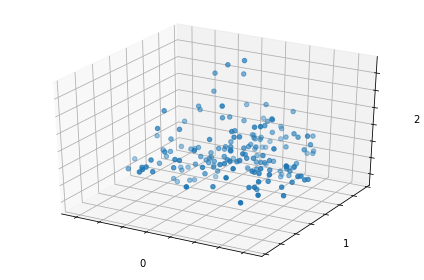

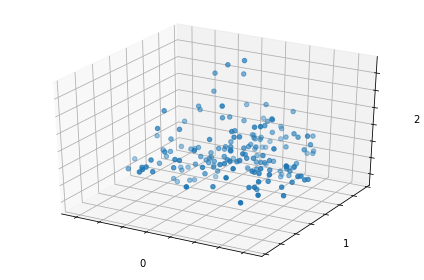

In [ ]:
b_c_ord_res.plot()

That worked - now to try with colors.

##Location PCoA

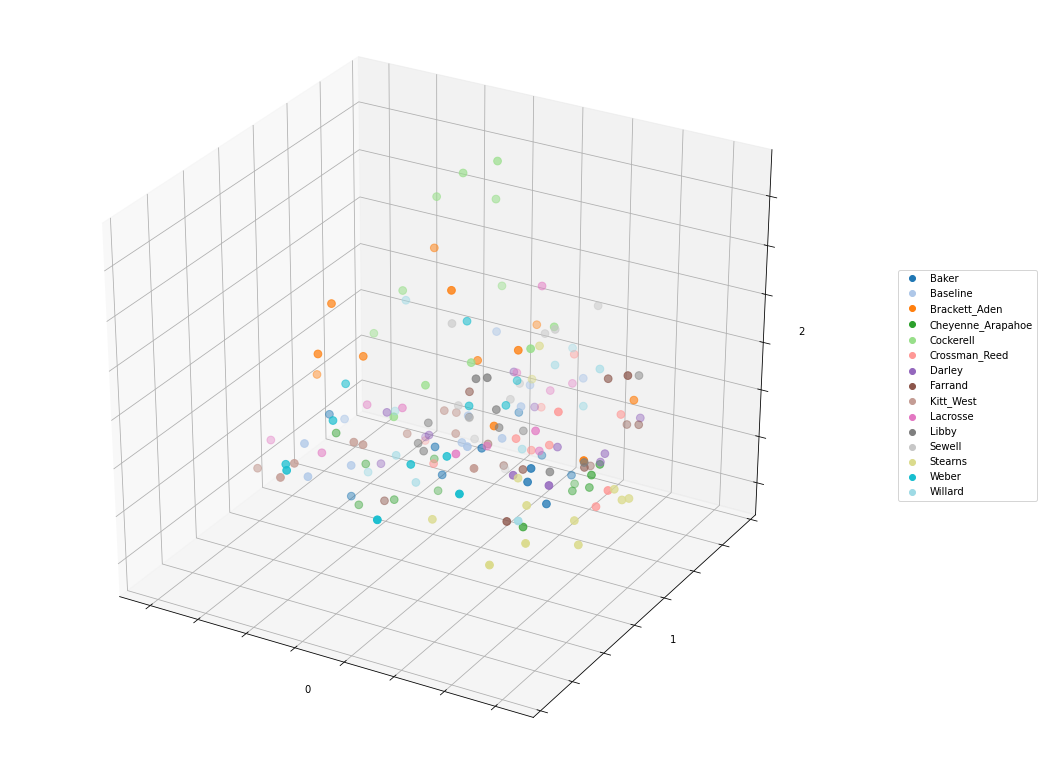

In [ ]:
b_c_ord_res.plot(df=metadata,
                 column='Location',
                 s=60,
                 cmap='tab20')
fig = plt.gcf()
fig.set_size_inches(20,12)

Sorry it is a little hard to see. I can't change the visualization background color in scikit-bio, as it's mostly for more exploratory pcoa, not publication level viz. Also the colormap choices were limited due to the number of categories. It might be best to make a PCoA with Emperor to get better and more interactive visualizations. I can also try other python libraries or importing to QIIME2 and making it that way.

Here's that same PCoA but with a different colormap. Maybe this is easier to read?

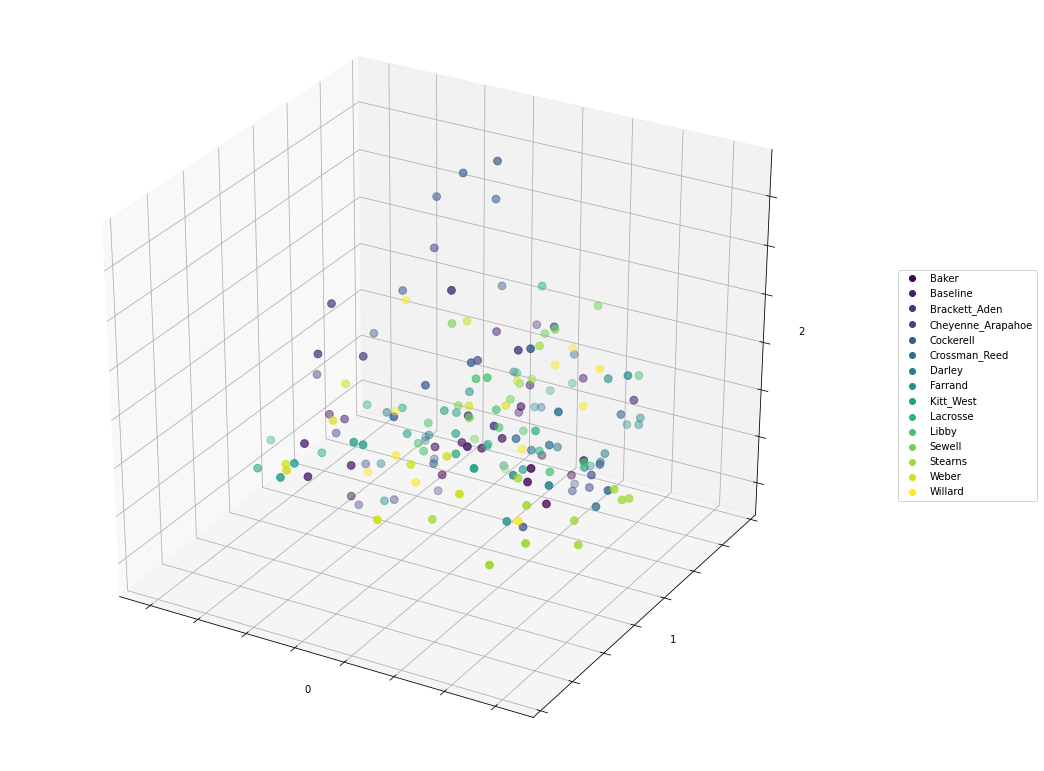

In [ ]:
b_c_ord_res.plot(df=metadata,
                 column='Location',
                 s=60)
fig = plt.gcf()
fig.set_size_inches(20,12)

##Weekend/Weekday PCoA

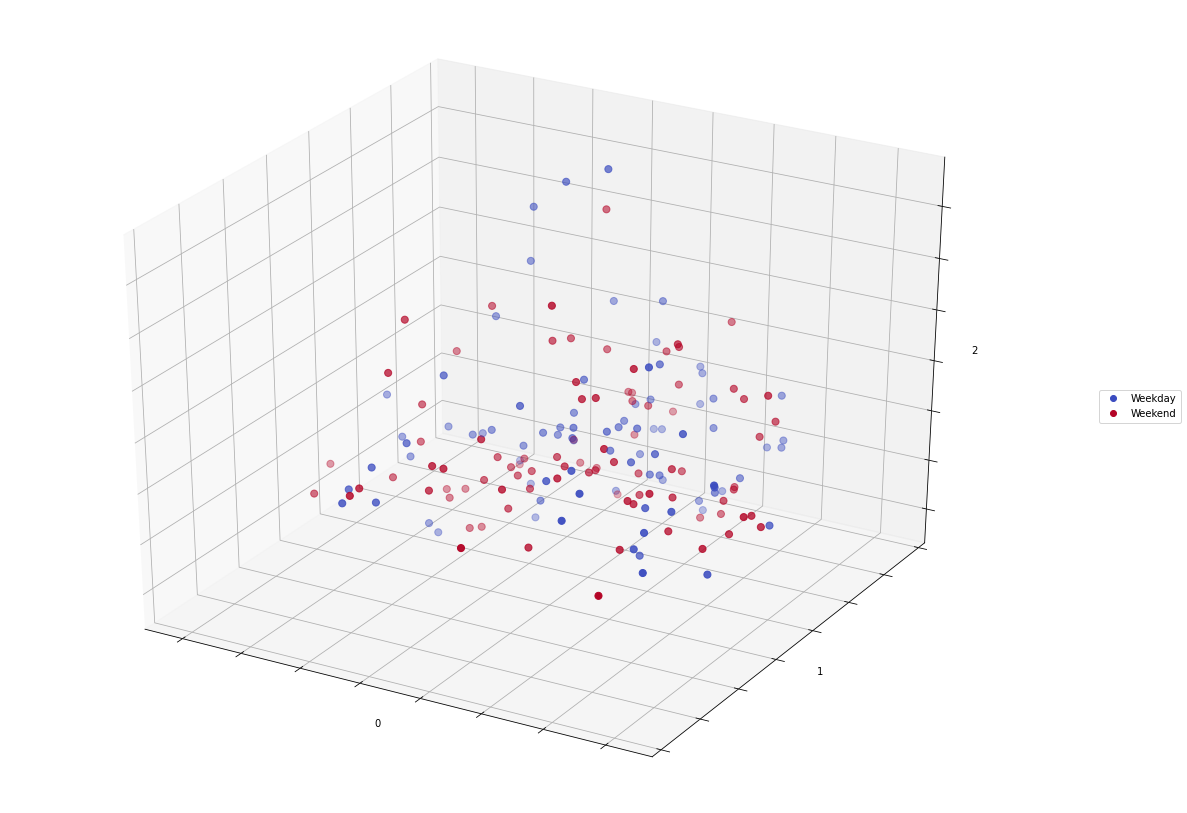

In [ ]:
b_c_ord_res.plot(df=metadata,
                 column='Weekend_Weekday',
                 s=50,
                 cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(20,12)

I'm not sure why some are darker than others. Ignore that please... (Can't really change that with this package)

##Trying others

In [ ]:
#b_c_ord_res.plot(df=metadata,
#                 column='sample_pH',
#                 s=30)
#fig = plt.gcf()
#fig.set_size_inches(20,12)

Will have to remake the distance matrix for PCoA with pH due to missing values

In [ ]:
#b_c_ord_res.plot(df=metadata,
#                column='SARS_CoV_2_detectable',
#                 s=30)
#fig = plt.gcf()
#fig.set_size_inches(20,12)

And for Sars as well...

In [ ]:
metadata['SARS_CoV_2_detectable'][metadata['SARS_CoV_2_detectable'].isnull()]

SampleID
FAR_12    NaN
KWC_10    NaN
Name: SARS_CoV_2_detectable, dtype: object

In [ ]:
metadata['sample_pH'][metadata['sample_pH'].isnull()]

SampleID
WEB_13   NaN
WIL_10   NaN
Name: sample_pH, dtype: float64

Looks like they're missing in different spots

##SARS PCoA

In [ ]:
sars_ntu = data_t.drop('taxonomy')[metadata['SARS_CoV_2_detectable'].isnull()==False]
sars_ntu.head()

SampleID        NTU_1        NTU_2        NTU_4  ... NTU_1123 NTU_1161 NTU_1557
0                                                ...                           
BAK_1     0.127758982  0.064282262    0.0353633  ...        0        0        0
BAK_10     0.06460396   0.09269802  0.036757426  ...        0        0        0
BAK_12    0.077020639  0.065951804   0.02911334  ...        0        0        0
BAK_13    0.058266972  0.125601198  0.035953639  ...        0        0        0
BAK_15    0.080519829  0.102224009  0.065648446  ...        0        0        0

[5 rows x 1087 columns]

In [ ]:
sars_bray_curt_dist_m = diversity.beta_diversity(metric='braycurtis',
                                                counts=sars_ntu,
                                                ids=sars_ntu.reset_index()[0])

In [ ]:
sars_b_c_ord_res = ordination.pcoa(sars_bray_curt_dist_m)

/usr/local/lib/python3.6/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.1978060285040452 and the largest is 4.3866278040471585.
  RuntimeWarning


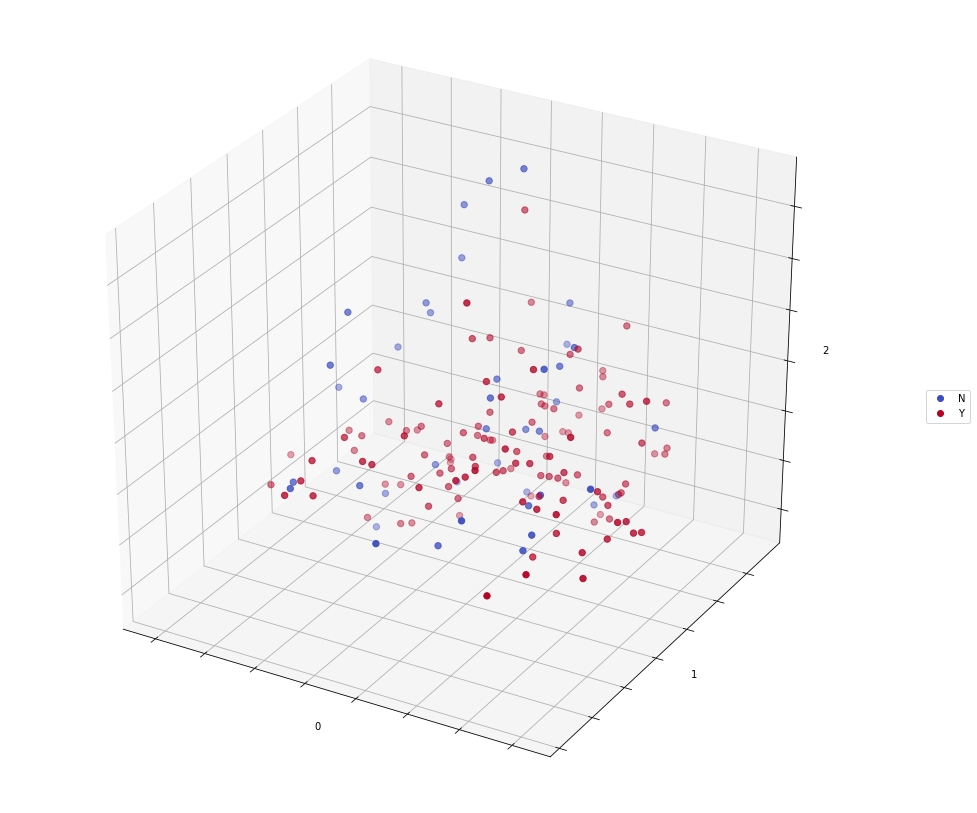

In [ ]:
sars_b_c_ord_res.plot(df=metadata,
                    column='SARS_CoV_2_detectable',
                    s=40,
                    cmap='coolwarm')
fig = plt.gcf()
fig.set_size_inches(15,12)

##pH PCoA

In [ ]:
pH_ntu = data_t.drop('taxonomy')[metadata['sample_pH'].isnull()==False]
pH_ntu.shape

(171, 1087)

In [ ]:
pH_bray_curt_dist_m = diversity.beta_diversity(metric='braycurtis',
                                                counts=pH_ntu,
                                                ids=pH_ntu.reset_index()[0])

In [ ]:
pH_b_c_ord_res = ordination.pcoa(pH_bray_curt_dist_m)

/usr/local/lib/python3.6/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19873603682068647 and the largest is 4.382767586352098.
  RuntimeWarning


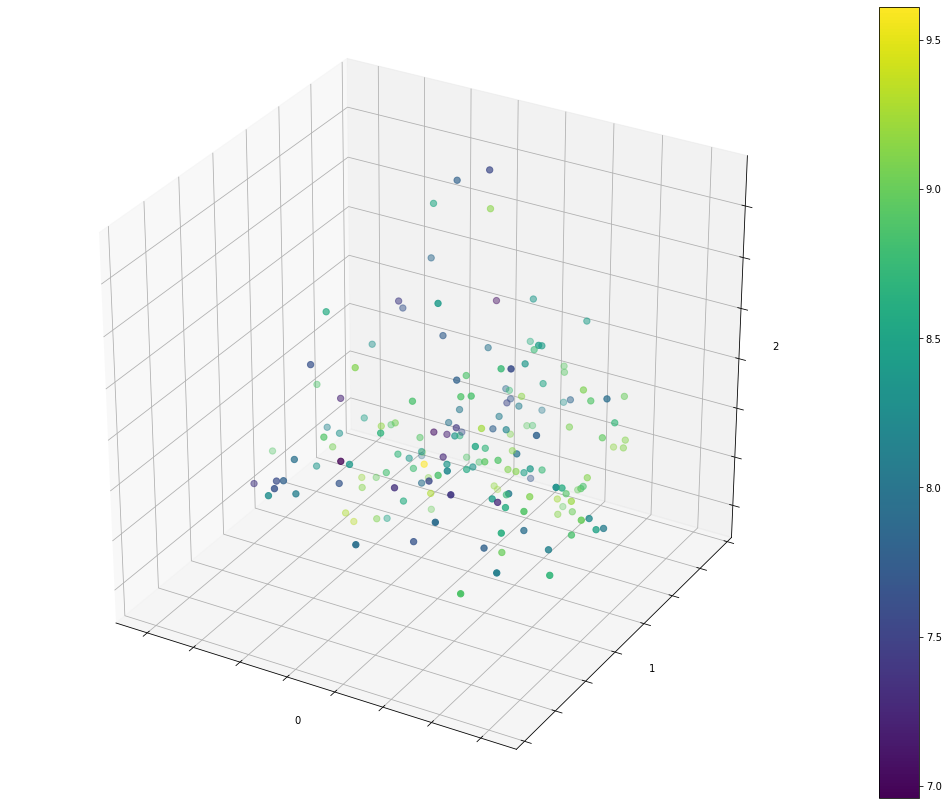

In [ ]:
pH_b_c_ord_res.plot(df=metadata,
                    column='sample_pH',
                    s=40)
fig = plt.gcf()
fig.set_size_inches(15,12)

##TSS PCoA

In [ ]:
TSS_ntu = data_t.drop('taxonomy')[metadata['TSS (g/L)'].isnull()==False]
TSS_ntu.shape

(164, 1087)

In [ ]:
TSS_bray_curt_dist_m = diversity.beta_diversity(metric='braycurtis',
                                                counts=TSS_ntu,
                                                ids=TSS_ntu.reset_index()[0])

In [ ]:
TSS_b_c_ord_res = ordination.pcoa(TSS_bray_curt_dist_m)

/usr/local/lib/python3.6/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.1889869552688046 and the largest is 4.249664495886608.
  RuntimeWarning


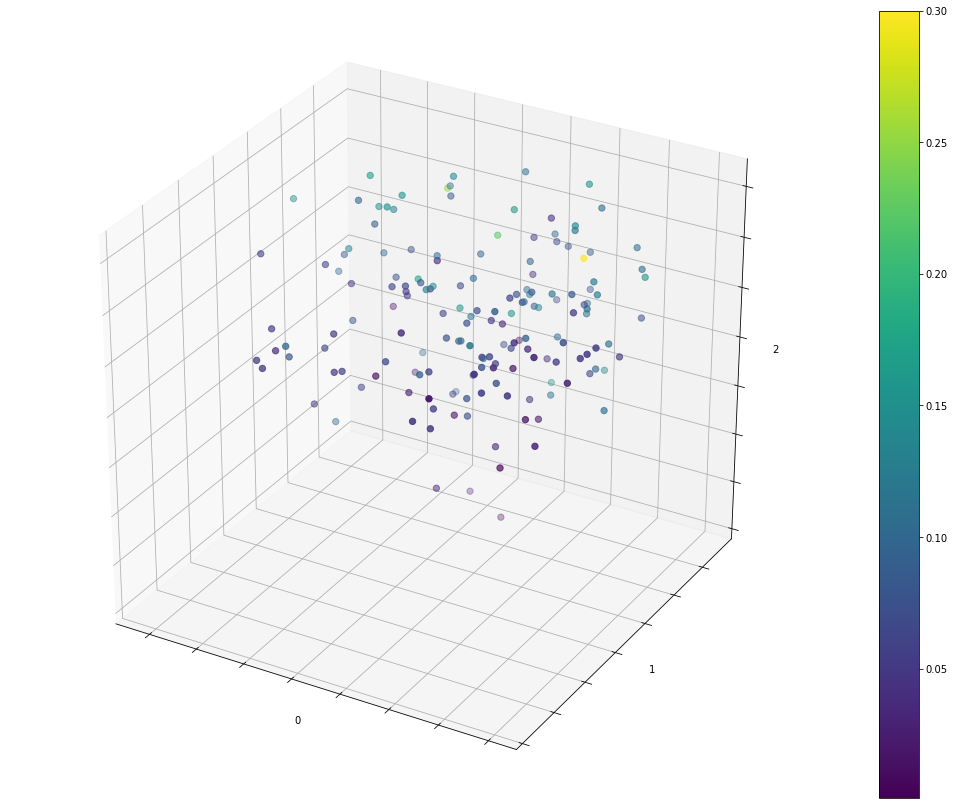

In [ ]:
TSS_b_c_ord_res.plot(df=metadata,
                    column='TSS (g/L)',
                    s=40)
fig = plt.gcf()
fig.set_size_inches(15,12)

#Bray Curtis NMDS

## TSS

NOTE! This stress is ungodly high!???

In [ ]:
from sklearn.manifold import MDS

In [ ]:
NMDS = MDS(n_components=3,
           metric=False,
           n_init=10,
           dissimilarity='precomputed')

In [ ]:
TSS_b_c_dist_df = TSS_bray_curt_dist_m.to_data_frame()

In [ ]:
b_c_nmds = NMDS.fit_transform(X=TSS_b_c_dist_df)

In [ ]:
TSS_metadata = metadata[metadata['TSS (g/L)'].isnull()==False]

In [ ]:
print(f'NMDS shape: {b_c_nmds.shape}')
print(f'Metadata shape: {metadata.shape}')
print(f'Metadata for TSS shape: {TSS_metadata.shape}')

NMDS shape: (164, 3)
Metadata shape: (173, 22)
Metadata for TSS shape: (164, 22)


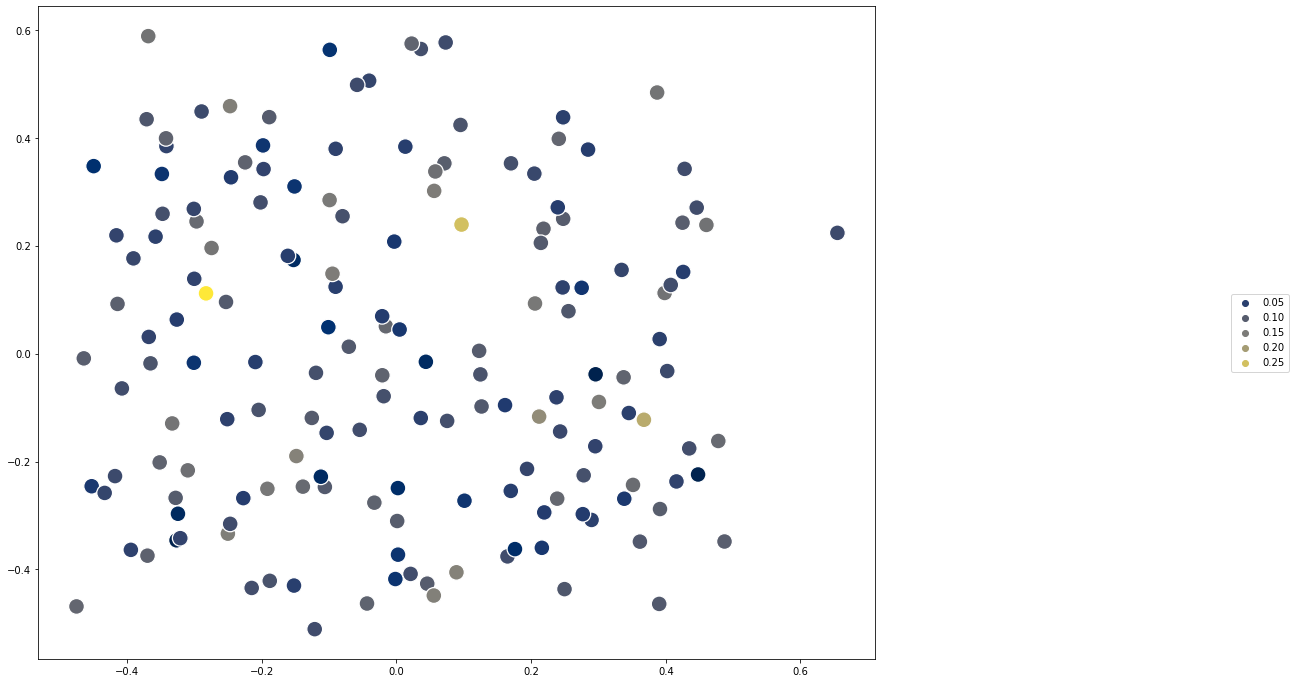

In [ ]:
sns.scatterplot(x = b_c_nmds[:, 0], 
                y = b_c_nmds[:, 1], 
                hue=metadata[metadata['TSS (g/L)'].isnull()==False]['TSS (g/L)'],
                palette='cividis',
                s=250)

plt.legend(bbox_to_anchor=(1.5, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(15,12)

In [ ]:
NMDS.stress_

391.6442739496409

# Comparing Bray-Curtis PCoA to NMDS

## TSS

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Bray Curtis PCoA')

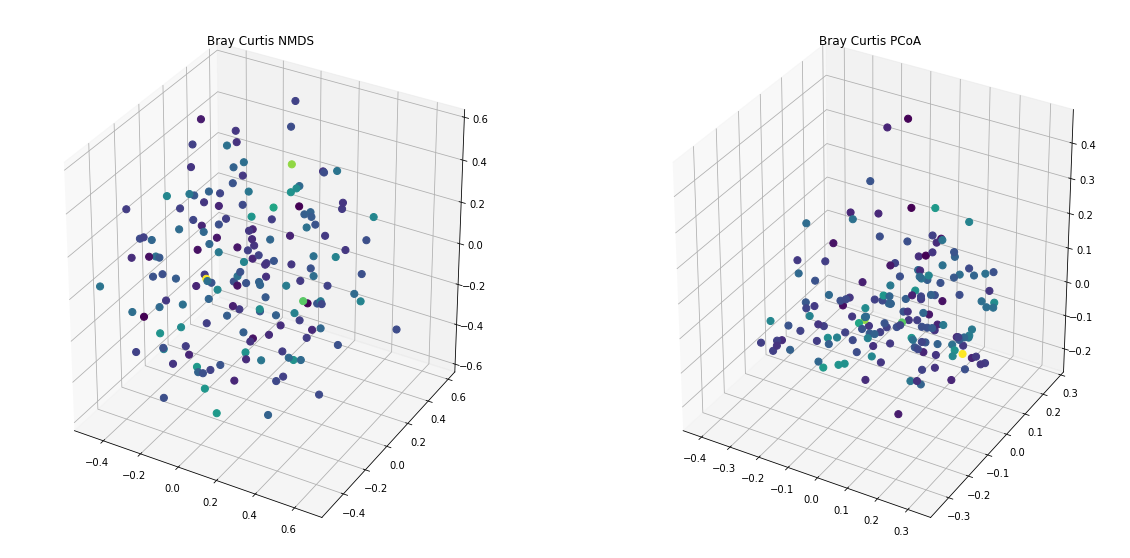

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs = b_c_nmds[:, 0], 
           ys = b_c_nmds[:, 1],
           zs = b_c_nmds[:, 2],
           s = 50,
           c = TSS_metadata['TSS (g/L)'],
           depthshade = False)
ax.set_title('Bray Curtis NMDS')

ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(xs = b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC1'], 
           ys = b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC2'],
           zs = b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC3'],
           s = 50,
           c = TSS_metadata['TSS (g/L)'],
           depthshade = False)

ax2.set_title('Bray Curtis PCoA')

In [ ]:
from matplotlib import cm

Text(0, 0.5, 'NMDS3')

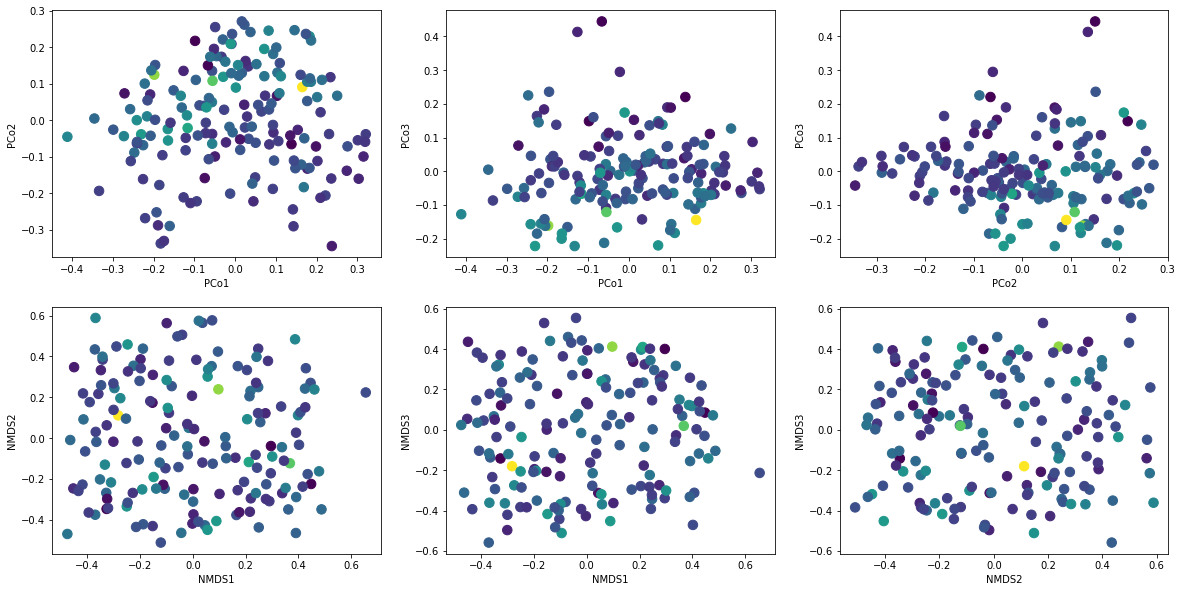

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(231)
ax.scatter(x=b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC1'],
           y=b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC2'],
           c=TSS_metadata['TSS (g/L)'],
           s=90)
ax.set_xlabel('PCo1')
ax.set_ylabel('PCo2')

ax = fig.add_subplot(232)
ax.scatter(x=b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC1'],
           y=b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC3'],
           c=TSS_metadata['TSS (g/L)'],
           s=90)
ax.set_xlabel('PCo1')
ax.set_ylabel('PCo3')

ax = fig.add_subplot(233)
ax.scatter(x=b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC2'],
           y=b_c_ord_res.samples[metadata['TSS (g/L)'].isnull()==False]['PC3'],
           c=TSS_metadata['TSS (g/L)'],
           s=90)
ax.set_xlabel('PCo2')
ax.set_ylabel('PCo3')

#NMDS time
ax = fig.add_subplot(234)
ax.scatter(x=b_c_nmds[:, 0],
           y=b_c_nmds[:, 1],
           c=TSS_metadata['TSS (g/L)'],
           s=90)
ax.set_xlabel('NMDS1')
ax.set_ylabel('NMDS2')

ax = fig.add_subplot(235)
ax.scatter(x=b_c_nmds[:, 0],
           y=b_c_nmds[:, 2],
           c=TSS_metadata['TSS (g/L)'],
           s=90)
ax.set_xlabel('NMDS1')
ax.set_ylabel('NMDS3')

ax = fig.add_subplot(236)
ax.scatter(x=b_c_nmds[:, 1],
           y=b_c_nmds[:, 2],
           c=TSS_metadata['TSS (g/L)'],
           s=90)
ax.set_xlabel('NMDS2')
ax.set_ylabel('NMDS3')

#No legend for now, but yellower means higher TSS

## High Temp

In [ ]:
High_ntu = data_t.drop('taxonomy')[metadata['HighTemp'].isnull()==False]
High_ntu.shape

(173, 1087)

In [ ]:
High_bray_curt_dist_m = diversity.beta_diversity(metric='braycurtis',
                                                counts=High_ntu,
                                                ids=High_ntu.reset_index()[0])

High_b_c_ord_res = ordination.pcoa(High_bray_curt_dist_m)

/usr/local/lib/python3.6/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.20201235371046297 and the largest is 4.430177038611037.
  RuntimeWarning


In [ ]:
NMDS = MDS(n_components=3,
           metric=False,
           dissimilarity='precomputed')

High_b_c_dist_df = High_bray_curt_dist_m.to_data_frame()

b_c_nmds = NMDS.fit_transform(X=High_b_c_dist_df)

#Not necessary below but doing it to compile a function
High_metadata = metadata[metadata['HighTemp'].isnull()==False]

Text(0.5, 0.92, 'Bray Curtis PCoA')

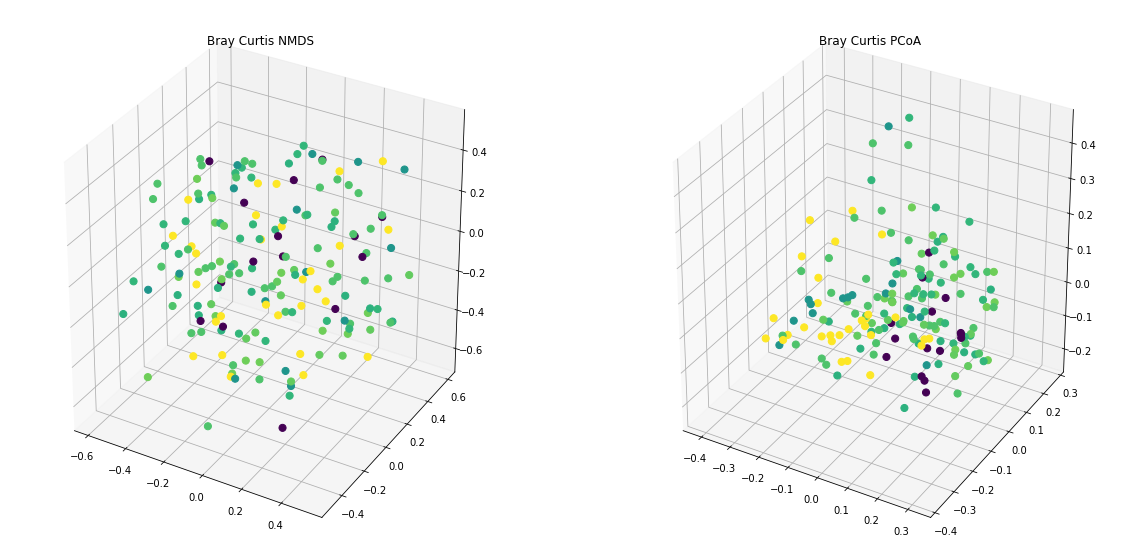

In [ ]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs = b_c_nmds[:, 0], 
           ys = b_c_nmds[:, 1],
           zs = b_c_nmds[:, 2],
           s = 50,
           c = High_metadata['HighTemp'],
           depthshade = False)
ax.set_title('Bray Curtis NMDS')

ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(xs = b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC1'], 
           ys = b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC2'],
           zs = b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC3'],
           s = 50,
           c = High_metadata['HighTemp'],
           depthshade = False)

ax2.set_title('Bray Curtis PCoA')

Text(0, 0.5, 'NMDS3')

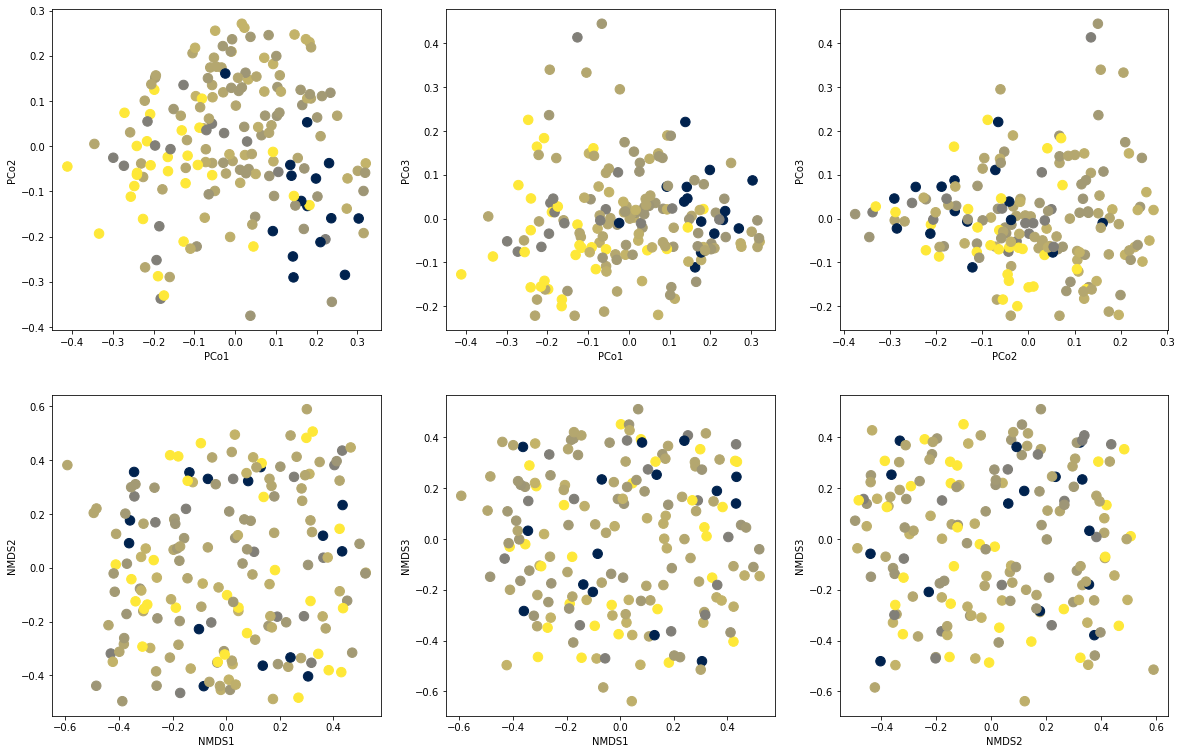

In [ ]:
fig = plt.figure(figsize=(20,13))

ax = fig.add_subplot(231)
ax.scatter(x=b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC1'],
           y=b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC2'],
           c=High_metadata['HighTemp'],
           s=90,
           cmap='cividis')
ax.set_xlabel('PCo1')
ax.set_ylabel('PCo2')

ax = fig.add_subplot(232)
ax.scatter(x=b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC1'],
           y=b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC3'],
           c=High_metadata['HighTemp'],
           s=90,
           cmap='cividis')
ax.set_xlabel('PCo1')
ax.set_ylabel('PCo3')

ax = fig.add_subplot(233)
ax.scatter(x=b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC2'],
           y=b_c_ord_res.samples[metadata['HighTemp'].isnull()==False]['PC3'],
           c=High_metadata['HighTemp'],
           s=90,
           cmap='cividis')
ax.set_xlabel('PCo2')
ax.set_ylabel('PCo3')

#NMDS time
ax = fig.add_subplot(234)
ax.scatter(x=b_c_nmds[:, 0],
           y=b_c_nmds[:, 1],
           c=High_metadata['HighTemp'],
           s=90,
           cmap='cividis')
ax.set_xlabel('NMDS1')
ax.set_ylabel('NMDS2')

ax = fig.add_subplot(235)
ax.scatter(x=b_c_nmds[:, 0],
           y=b_c_nmds[:, 2],
           c=High_metadata['HighTemp'],
           s=90,
           cmap='cividis')
ax.set_xlabel('NMDS1')
ax.set_ylabel('NMDS3')

ax = fig.add_subplot(236)
ax.scatter(x=b_c_nmds[:, 1],
           y=b_c_nmds[:, 2],
           c=High_metadata['HighTemp'],
           s=90,
           cmap='cividis')
ax.set_xlabel('NMDS2')
ax.set_ylabel('NMDS3')

## Low Temp

In [ ]:
def PCoAvsNMDS(ntutable, metadata, column, cmap='cividis'):
  new_ntu = data_t.drop('taxonomy')[metadata[column].isnull()==False]
  new_metadata = metadata[metadata[column].isnull()==False]
  
  new_bray_curt_dist_m = diversity.beta_diversity(metric='braycurtis',
                                                counts=new_ntu,
                                                ids=new_ntu.reset_index()[0])

  new_b_c_ord_res = ordination.pcoa(new_bray_curt_dist_m)

  NMDS = MDS(n_components=3,
            metric=False,
            dissimilarity='precomputed')

  new_b_c_dist_df = new_bray_curt_dist_m.to_data_frame()

  b_c_nmds = NMDS.fit_transform(X=new_b_c_dist_df)

  
  #Making 3d fig
  fig = plt.figure(figsize=(20,10))

  ax = fig.add_subplot(121, projection='3d')
  ax.scatter(xs = b_c_nmds[:, 0], 
            ys = b_c_nmds[:, 1],
            zs = b_c_nmds[:, 2],
            s = 50,
            c = new_metadata[column],
            depthshade = False,
            cmap=cmap)
  ax.set_title('Bray Curtis NMDS')

  ax2 = fig.add_subplot(122,projection='3d')
  ax2.scatter(xs = new_b_c_ord_res.samples['PC1'], 
            ys = new_b_c_ord_res.samples['PC2'],
            zs = new_b_c_ord_res.samples['PC3'],
            s = 50,
            c = new_metadata[column],
            depthshade = False,
            cmap=cmap)
  ax2.set_title('Bray Curtis PCoA')

  plt.show()


  #Making 2d fig
  fig = plt.figure(figsize=(20,13))

  ax = fig.add_subplot(231)
  ax.scatter(x=new_b_c_ord_res.samples['PC1'],
            y=new_b_c_ord_res.samples['PC2'],
            c=new_metadata[column],
            s=90,
            cmap=cmap)
  ax.set_xlabel('PCo1')
  ax.set_ylabel('PCo2')

  ax = fig.add_subplot(232)
  ax.scatter(x=new_b_c_ord_res.samples['PC1'],
            y=new_b_c_ord_res.samples['PC3'],
            c=new_metadata[column],
            s=90,
            cmap=cmap)
  ax.set_xlabel('PCo1')
  ax.set_ylabel('PCo3')

  ax = fig.add_subplot(233)
  ax.scatter(x=new_b_c_ord_res.samples['PC2'],
            y=new_b_c_ord_res.samples['PC3'],
            c=new_metadata[column],
            s=90,
            cmap=cmap)
  ax.set_xlabel('PCo2')
  ax.set_ylabel('PCo3')

  #NMDS time
  ax = fig.add_subplot(234)
  ax.scatter(x=b_c_nmds[:, 0],
            y=b_c_nmds[:, 1],
            c=new_metadata[column],
            s=90,
            cmap=cmap)
  ax.set_xlabel('NMDS1')
  ax.set_ylabel('NMDS2')

  ax = fig.add_subplot(235)
  ax.scatter(x=b_c_nmds[:, 0],
            y=b_c_nmds[:, 2],
            c=new_metadata[column],
            s=90,
            cmap=cmap)
  ax.set_xlabel('NMDS1')
  ax.set_ylabel('NMDS3')

  ax = fig.add_subplot(236)
  ax.scatter(x=b_c_nmds[:, 1],
            y=b_c_nmds[:, 2],
            c=new_metadata[column],
            s=90,
            cmap=cmap)
  ax.set_xlabel('NMDS2')
  ax.set_ylabel('NMDS3')

/usr/local/lib/python3.6/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.20201235371046297 and the largest is 4.430177038611037.
  RuntimeWarning


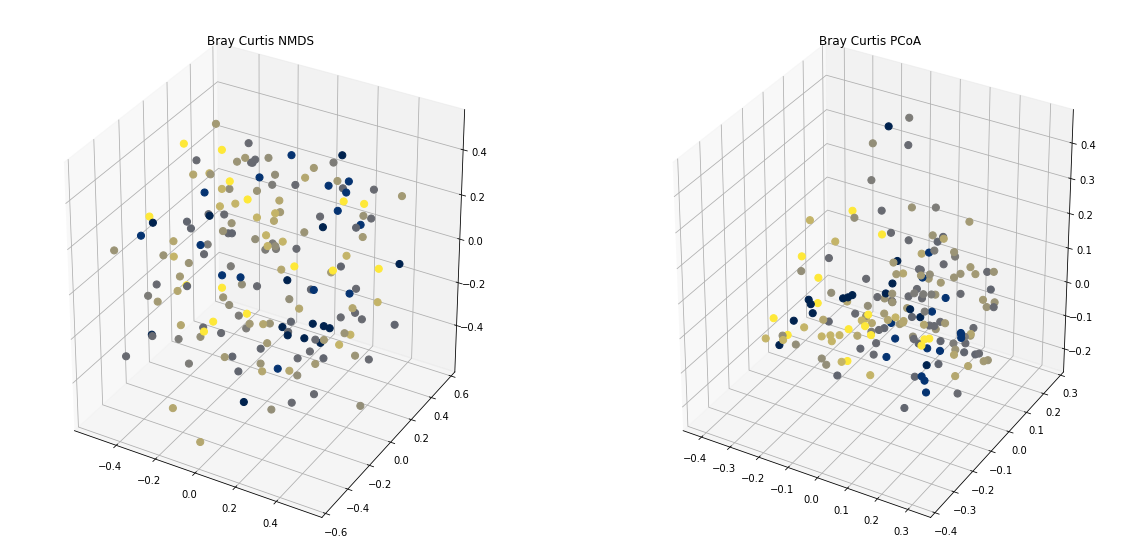

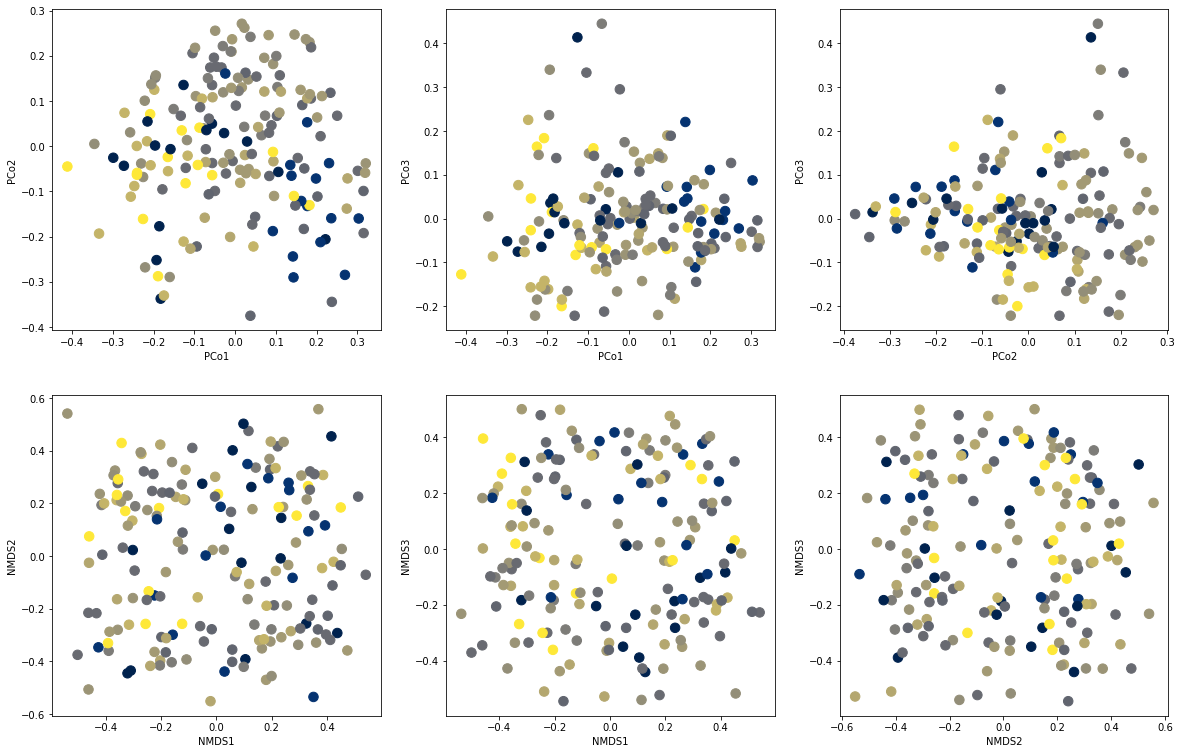

In [ ]:
PCoAvsNMDS(data_t, metadata=High_metadata, column='LowTemp')

#Exporting the distance matrix to be used in QIIME2

Commented out so I don't accidentally run these cells again when the Colab runtime restarts

In [ ]:
#bray_curt_dist_m.write(file='bray_curt_dist_m.lsmat')

In [ ]:
#ls

In [ ]:
#metadata.to_csv('MetaData.tsv', sep='\t')

In [ ]:
#%ls

I then downloaded that bray_curt_dist_m.lsmat file (after moving it to a QIIME2 files folder in our shared folder), and I downloaded the MetaData.tsv file

Then I ran the following script in the terminal:
`qiime tools import \
--type DistanceMatrix \
--input-path bray_curt_dist_m.lsmat \
--output-path bray_curt_dist_m.qza` 

This created a distance matrix .qza file `bray_curt_dist_m.qza`

Then:

`qiime diversity pcoa \
--i-distance-matrix bray_curt_dist_m.qza \
--o-pcoa bray_curtis_pcoa.qza`


`qiime emperor plot \
--i-pcoa bray_curtis_pcoa.qza \
--m-metadata-file MetaData.tsv \
--o-visualization bray_curtis_pcoa.qzv`

#Mantel Test

Pseudocode for Sarah:

```
new_ntu = ntu_table.filter(metadata_column.isnull()==False)new_metadata = metadata.filter(metadata_column.isnull()==False)

dm_ntu = bray_curt(ntu_table)
dm_variable = bray_curt(metadata_variable)

results = mantel(dm_ntu, dm_variable)

```


# Metadata plot again

In [ ]:
metadata.head()

Date Weekend_Weekday Location  ...  LowTemp  HighTemp  Precip
SampleID                                   ...                           
BAK_1      1-Sep         Weekday    Baker  ...       48        82    0.13
BAK_10    10-Sep         Weekday    Baker  ...       35        49    0.02
BAK_12    12-Sep         Weekend    Baker  ...       44        81    0.00
BAK_13    13-Sep         Weekend    Baker  ...       45        85    0.00
BAK_15    15-Sep         Weekday    Baker  ...       52        88    0.00

[5 rows x 22 columns]

In [ ]:
plt.style.use('ggplot')

In [ ]:
sns.set_style("white")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


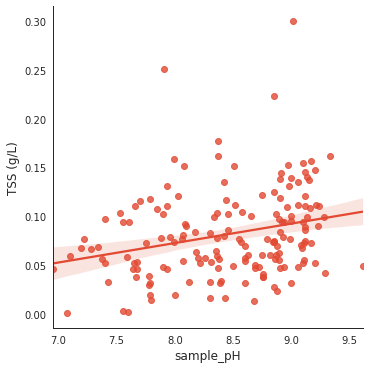

In [ ]:
sns.lmplot('sample_pH',
           'TSS (g/L)',
            data=metadata[metadata['TSS (g/L)'].isnull()==False])

In [ ]:
days_grouped_avg = metadata.groupby(by='DaysSince',as_index=False).mean()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


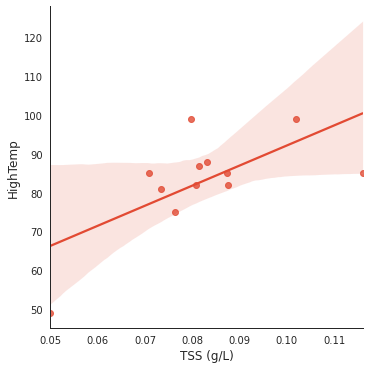

In [ ]:
sns.lmplot('TSS (g/L)',
           'HighTemp',
            data=days_grouped_avg)

#Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_t_tax = data_t 
data_t_tax.columns = [';'.join(tax.split(';')[-2:]) for tax in data_t.loc['taxonomy']]

randfor_data = pd.concat([data_t_tax, metadata['SARS_CoV_2_detectable']],
                          axis=1).drop('taxonomy')

Need to remove where SARS detection is null:

In [ ]:
randfor_data = randfor_data[randfor_data['SARS_CoV_2_detectable'].isna()==False]

In [ ]:
X = randfor_data.drop('SARS_CoV_2_detectable', axis=1)
y = randfor_data['SARS_CoV_2_detectable']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(random_state=42)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_predicted = forest.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_predicted))
print('\n')
print('   N  Y')
print(confusion_matrix(y_test,y_predicted,))

              precision    recall  f1-score   support

           N       0.83      0.36      0.50        14
           Y       0.82      0.98      0.89        43

    accuracy                           0.82        57
   macro avg       0.83      0.67      0.70        57
weighted avg       0.83      0.82      0.80        57



   N  Y
[[ 5  9]
 [ 1 42]]


Summary: This model has a tendency toward overpredicting Yes. Out of 57 total test outcomes with 42 SARS-positive, there were 9 false positives. This can be further evidenced by the low recall for SARS-negative. For context, the recall is calculated as such:

\begin{equation}
recall = \frac{TrueNeg}{TrueNeg + FalsePos}
\end{equation}

The overall accuracy was 81%.

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [ ]:
export_graphviz(forest.estimators_[99], out_file='tree.dot', 
                feature_names = X.columns,
                class_names = y.unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

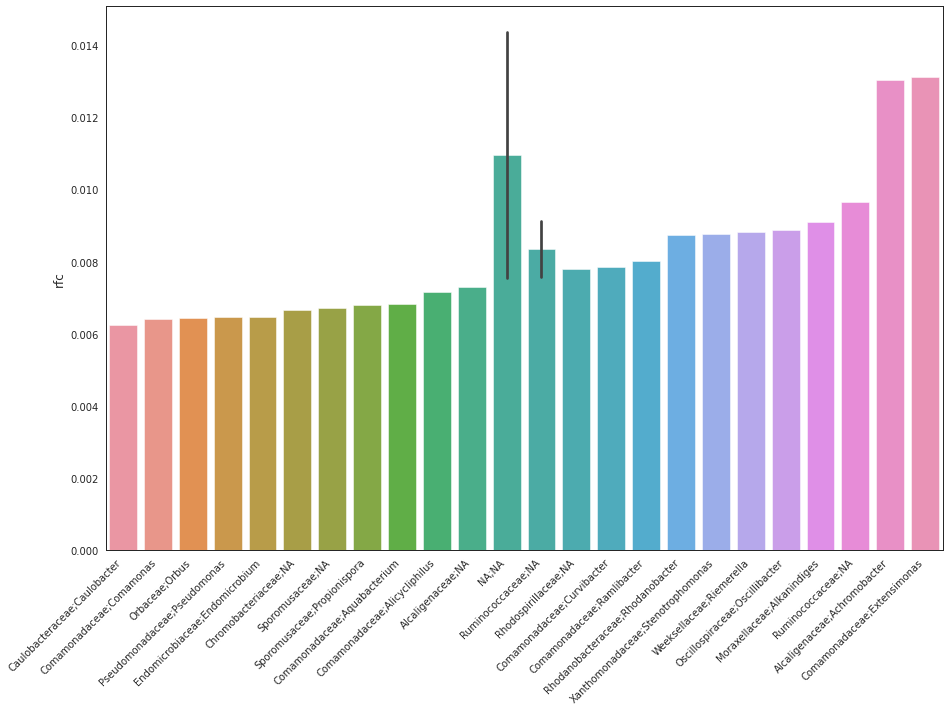

In [ ]:
feature_importance=pd.DataFrame({'rfc':forest.feature_importances_},
                                index=X.columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)
feature_importance = feature_importance[feature_importance['rfc']>0.006]

ax = sns.barplot(x=feature_importance.index,
                 y=feature_importance['rfc'])

ax.set_xticklabels(labels=feature_importance.index,
                   rotation=45,
                   ha='right')

fig = plt.gcf()
fig.set_size_inches(15,10)

Notes on these most important features:


1.   **Extensimonas:** "Extensimonas with a single species, Extensimonas vulgaris,was created for a bacterium from industrial wastewater that grows at 15–50 C (Zhang et al. 2013b)"[[1]](https://link.springer.com/content/pdf/10.1007%2F978-3-642-30197-1_238.pdf). There does not seem to be much knowledge of it as a gut microbe.
2.   **Achromobacter:** "Multiresistant opportunistic hydro-telluric pathogens, are emerging in hospital environments" [[2]](https://bmcinfectdis.biomedcentral.com/articles/10.1186/s12879-019-4431-3). Conditions for opportunistic infections include "cystic fibrosis, hematologic and solid organ malignancies, renal failure, and certain immune deficiencies" [[3]](https://www.atsjournals.org/doi/10.1513/AnnalsATS.201406-288FR).

3.   **Ruminococcaceae:** A predominant gut microbe of the phylum Firmicutes (includes keystone species such as *Faecalibacterium prausnitzii*). This is underrepresented in COVID-19 patients who have been exposed to antibiotics and negatively correlated with COVID-19 severity [[4]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7237927/).

4.   **Alkanindiges:** Primarily considered a sludge-degrading bacteria; however, it is enriched in the *nasal* microbiomes of patients who have exacerbated asthma symptoms [[5]](https://www.jacionline.org/article/S0091-6749(18)30309-9/pdf).

5.   **Oscillibacter:** Valerate-producing gut microbe







Below I will perform a permutational test to assess feature importance

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
perm_importance = permutation_importance(forest, X_test, y_test, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

In [ ]:
perm_importance['importances_mean']

array([0.        , 0.01052632, 0.00701754, ..., 0.        , 0.        ,
       0.        ])

In [ ]:
perm_importances = pd.DataFrame(data= {'importances':perm_importance['importances_mean']},
                                index=X.columns)
perm_importances.sort_values(by='importances',ascending=True,inplace=True)

perm_importances = perm_importances[(perm_importances['importances'] > 0.01) | (perm_importances['importances'] < -0.01)]

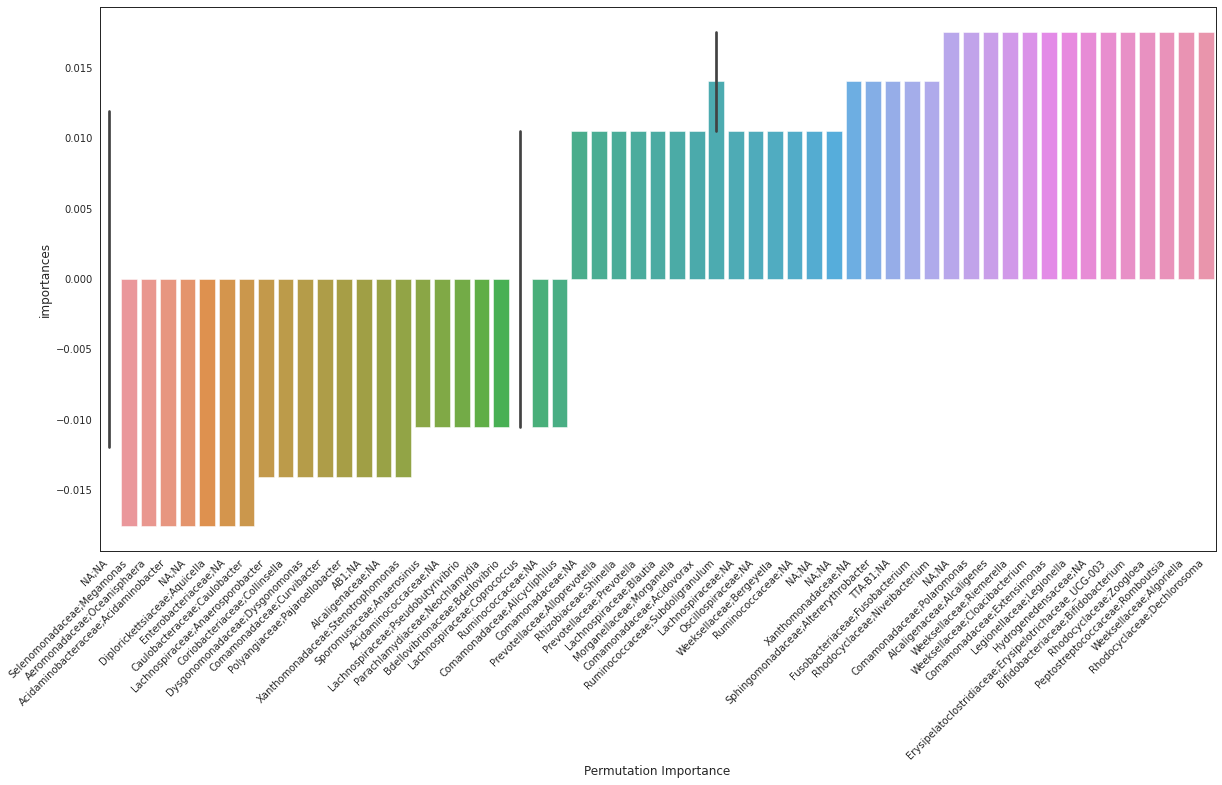

In [ ]:
ax = sns.barplot(x=perm_importances.index,
            y=perm_importances['importances'])
plt.xlabel("Permutation Importance")

ax.set_xticklabels(labels=perm_importances.index,
                   rotation=45,
                   ha='right')

fig = plt.gcf()
fig.set_size_inches(20,10)

In [ ]:
for tax in perm_importances.index:
  print(tax)

NA;NA
Selenomonadaceae;Megamonas
Aeromonadaceae;Oceanisphaera
Acidaminobacteraceae;Acidaminobacter
NA;NA
Diplorickettsiaceae;Aquicella
Enterobacteriaceae;NA
Caulobacteraceae;Caulobacter
Lachnospiraceae;Anaerosporobacter
Coriobacteriaceae;Collinsella
Dysgonomonadaceae;Dysgonomonas
Comamonadaceae;Curvibacter
Polyangiaceae;Pajaroellobacter
AB1;NA
Alcaligenaceae;NA
Xanthomonadaceae;Stenotrophomonas
Sporomusaceae;Anaerosinus
Acidaminococcaceae;NA
Lachnospiraceae;Pseudobutyrivibrio
Parachlamydiaceae;Neochlamydia
Bdellovibrionaceae;Bdellovibrio
Lachnospiraceae;Coprococcus
Ruminococcaceae;NA
Comamonadaceae;Alicycliphilus
Comamonadaceae;NA
Prevotellaceae;Alloprevotella
Rhizobiaceae;Shinella
Prevotellaceae;Prevotella
Lachnospiraceae;Blautia
Morganellaceae;Morganella
Comamonadaceae;Acidovorax
Ruminococcaceae;Subdoligranulum
Lachnospiraceae;NA
Oscillospiraceae;NA
Weeksellaceae;Bergeyella
Ruminococcaceae;NA
NA;NA
NA;NA
Xanthomonadaceae;NA
Sphingomonadaceae;Altererythrobacter
TTA-B1;NA
Fusobacteriac

Important features from permutational feature importance test:

**Positive**
1.   **Legionella:** Pneumonia causing bacteria - Some evidence of increased risk of infection after COVID in Italy [[1]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7393852/)! Could be related to stagnant water in sewer systems from shutdowns.
2.   **Lachnospiraceae:** Gut microbe - SCFA former, associated with low SARS-infectivity [[2]](https://gut.bmj.com/content/early/2020/07/19/gutjnl-2020-322294.abstract). Lachnospiraceae relative abundances increase when gut-derived antimicrobial peptides such as angiogenin inhibit alpha-proteobacteria growth [[3]](https://gut.bmj.com/content/early/2020/08/25/gutjnl-2019-320135). Perhaps COVID is triggering an immune response, causing AMP release?


**Negative**

1.   **Megamonas:** Seems to be a beneficial gut microbe [(Source)](https://www.nature.com/articles/s41598-017-17851-8)? It is decreased in immune dystruption from Behcet's disease [(Source)](https://pubmed.ncbi.nlm.nih.gov/30628011/).
2.   List item




##Feature engineering
(unsuccessful)

Going to narrow down taxa table based on SARS up/down-regulated fecal bacteria according to 

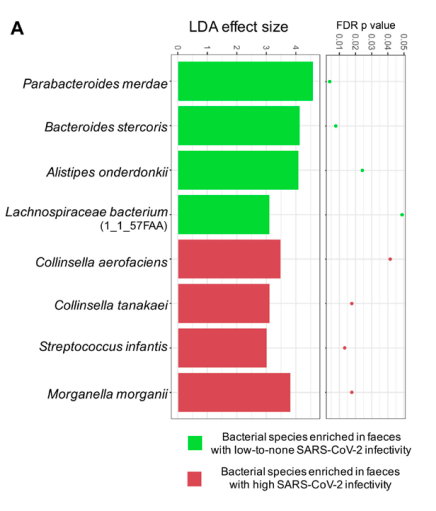

https://gut.bmj.com/content/early/2020/07/19/gutjnl-2020-322294.abstract 

> Over the course of hospitalization, Bacteroides dorei, Bacteroides thetaiotaomicron, Bacteroides massiliensis, and Bacteroides ovatus, which downregulate expression of angiotensin-converting enzyme 2 (ACE2) in murine gut, correlated inversely with SARS-CoV-2 load in fecal samples from patients.


https://www.sciencedirect.com/science/article/pii/S0016508520347016

In [ ]:
data_t.loc['taxonomy']

Comamonadaceae;Comamonas                  Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
Comamonadaceae;Acidovorax                 Bacteria;Proteobacteria;Gammaproteobacteria;Bu...
Aeromonadaceae;Aeromonas                  Bacteria;Proteobacteria;Gammaproteobacteria;En...
Moraxellaceae;Acinetobacter               Bacteria;Proteobacteria;Gammaproteobacteria;Ps...
Arcobacteraceae;Arcobacter                Bacteria;Campylobacterota;Campylobacteria;Camp...
                                                                ...                        
Methanobacteriaceae;Methanobrevibacter    Archaea;Euryarchaeota;Methanobacteria;Methanob...
Methanoregulaceae;Methanoregula           Archaea;Halobacterota;Methanomicrobia;Methanom...
Methanospirillaceae;Methanospirillum      Archaea;Halobacterota;Methanomicrobia;Methanom...
Methanosaetaceae;Methanosaeta             Archaea;Halobacterota;Methanosarcinia;Methanos...
Methanosarcinaceae;Methanosarcina         Archaea;Halobacterota;Methanosarcinia;

In [ ]:
for taxon in data_t.loc['taxonomy',data_t.loc['taxonomy'].str.contains('Collinsella')]:
  print(taxon)

Bacteria;Actinobacteriota;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Collinsella


Collinsella genus shows up but not to species level

In [ ]:
for taxon in data_t.loc['taxonomy',data_t.loc['taxonomy'].str.contains('Bacteroides')]:
  print(taxon)

Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;[Bacteroides]_pectinophilus_group


Bacteroides shows up, but no species level (stercoris). Will have to include its family to avoid picking out ones I don't want

In [ ]:
for taxon in data_t.loc['taxonomy',data_t.loc['taxonomy'].str.contains('Parabacteroides')]:
  print(taxon)

Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Tannerellaceae;Parabacteroides


In [ ]:
for taxon in data_t.loc['taxonomy',data_t.loc['taxonomy'].str.contains('Alistipes')]:
  print(taxon)

Bacteria;Bacteroidota;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes


In [ ]:
for taxon in data_t.loc['taxonomy',data_t.loc['taxonomy'].str.contains('Streptococcus')]:
  print(taxon)

Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus
Bacteria;Firmicutes;Bacilli;Lactobacillales;P5D1-392;Streptococcus_sp._oral_clone_ASCB12


Again will have to use family to filter correctly 

In [ ]:
for taxon in data_t.loc['taxonomy',data_t.loc['taxonomy'].str.contains('Morganella')]:
  print(taxon)

Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Morganella
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Providencia
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Candidatus Baumannia
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Proteus
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;NA
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Moellerella
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Arsenophonus
Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Morganellaceae;Xenorhabdus


Will use family here too^

In [ ]:
for taxon in data_t.loc['taxonomy',data_t.loc['taxonomy'].str.contains('Lachnospiraceae')]:
  print(taxon)

Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Blautia
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;NA
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Agathobacter
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnoclostridium
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Roseburia
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Fusicatenibacter
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;[Ruminococcus]_torques_group
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;NA
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Anaerostipes
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnospira
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;[Eubacterium]_hallii_group
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnospiraceae_NK4A136_group
Bacteria;Firmicutes;Clostridia;Lachnospirales;Lachnospiraceae;Lachnospira

I'm not seeing the one we want here, and there are so many others. Going to exclude this one.

In [ ]:
genuses = 'Parabacteroides|Bacteroidaceae;Bacteroides|Alistipes|Collinsella|Streptococcaceae;Streptococcus|Morganellaceae;Morganella'

In [ ]:
of_interest = data_t.loc[:,data_t.loc['taxonomy'].str.contains(genuses,case=False)]

In [ ]:
of_interest = pd.concat([of_interest.drop('taxonomy'),
                         metadata['SARS_CoV_2_detectable']],
                        axis=1)
of_interest = of_interest[of_interest['SARS_CoV_2_detectable'].isna()==False]

In [ ]:
X = of_interest.drop('SARS_CoV_2_detectable', axis=1)
y = of_interest['SARS_CoV_2_detectable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
forest2 = RandomForestClassifier(random_state=42)
forest2.fit(X_train,y_train)
y_pred = forest2.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
print('\n')
print('   N  Y')
print(confusion_matrix(y_test,y_predicted,))

              precision    recall  f1-score   support

           N       0.00      0.00      0.00        14
           Y       0.75      0.95      0.84        43

    accuracy                           0.72        57
   macro avg       0.37      0.48      0.42        57
weighted avg       0.56      0.72      0.63        57



   N  Y
[[ 5  9]
 [ 1 42]]


In [ ]:
y.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
export_graphviz(forest2.estimators_[99], out_file='tree.dot', 
                feature_names = X.columns,
                class_names = y.unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

In [ ]:
export_graphviz(forest2.estimators_[99], out_file='tree.dot', 
                feature_names = X.columns,
                class_names = y.unique(),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

# Relative abundances of respiratory pathogens and others identified by random forest and Liam's network analysis

In [ ]:
of_interest = randfor_data.loc[:,perm_importances.index].drop('NA;NA',axis=1)

In [ ]:
of_interest = pd.concat([of_interest,metadata[['SARS_CoV_2_detectable','Location','DaysSince']]],axis=1)

In [ ]:
of_interest.head()

Selenomonadaceae;Megamonas  ... DaysSince
BAK_1                 0.020621879  ...         0
BAK_10                0.003341584  ...         9
BAK_12                0.007840424  ...        11
BAK_13                0.003311519  ...        12
BAK_15                0.008842444  ...        14

[5 rows x 78 columns]

In [ ]:
for col in perm_importances.index:
  try:
    of_interest[col] = of_interest[col].astype(str).astype(float)
  except KeyError:
    pass

In [ ]:
of_interest['SARS_CoV_2_detectable'] = of_interest['SARS_CoV_2_detectable'].astype(str)
of_interest['Location'] = of_interest['Location'].astype(str)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


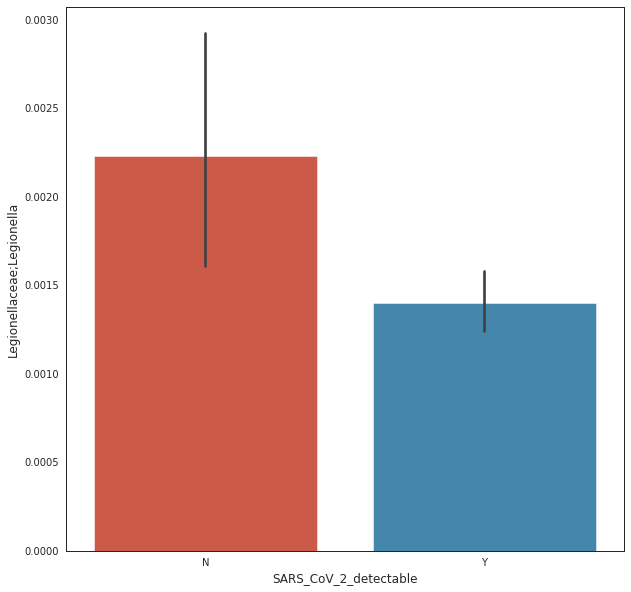

In [ ]:
sns.barplot('SARS_CoV_2_detectable',
            'Legionellaceae;Legionella',
            data=of_interest.dropna())

fig = plt.gcf()
fig.set_size_inches(10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


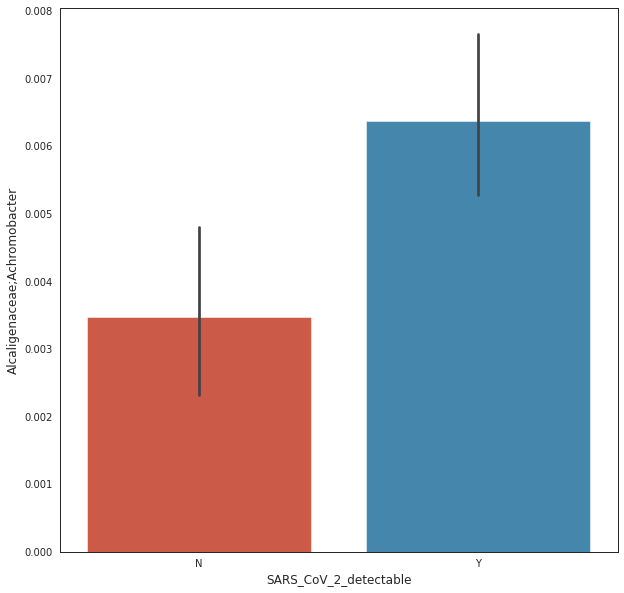

In [ ]:
sns.barplot('SARS_CoV_2_detectable',
            'Alcaligenaceae;Achromobacter',
            data=of_interest.dropna())

fig = plt.gcf()
fig.set_size_inches(10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


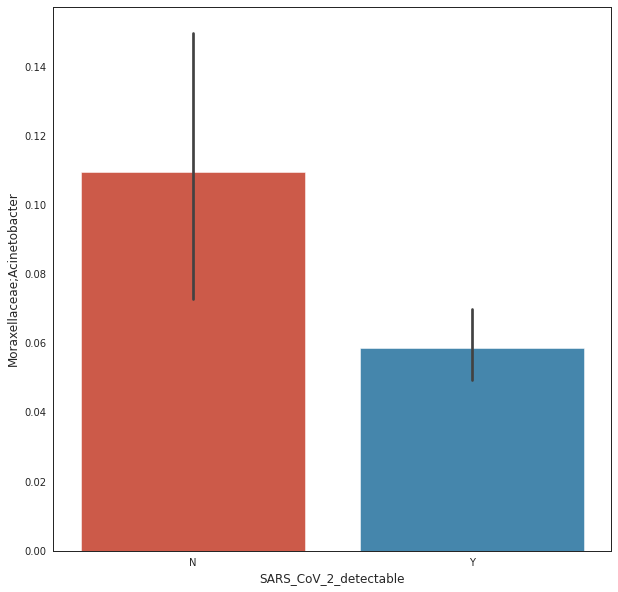

In [ ]:
sns.barplot('SARS_CoV_2_detectable',
            'Moraxellaceae;Acinetobacter',
            data=of_interest.dropna())

fig = plt.gcf()
fig.set_size_inches(10,10)

Will asks: how many SARS-pos samples total?

In [ ]:
print('Number of SARS-positive samples:')
print(sum(of_interest['SARS_CoV_2_detectable']=='Y'))
print('\nTotal samples:')
print(of_interest['SARS_CoV_2_detectable'].count())

Number of SARS-positive samples:
128

Total samples:
173


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


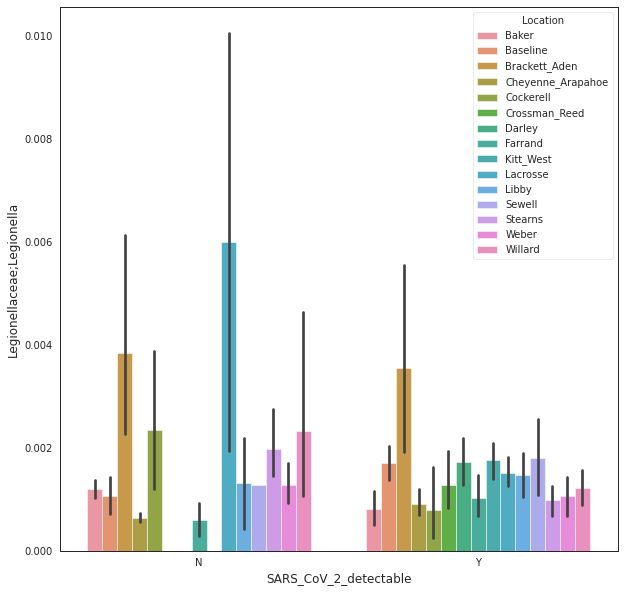

In [ ]:
sns.barplot('SARS_CoV_2_detectable',
            'Legionellaceae;Legionella',
            hue='Location',
            data=of_interest.dropna())

fig = plt.gcf()
fig.set_size_inches(10,10)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


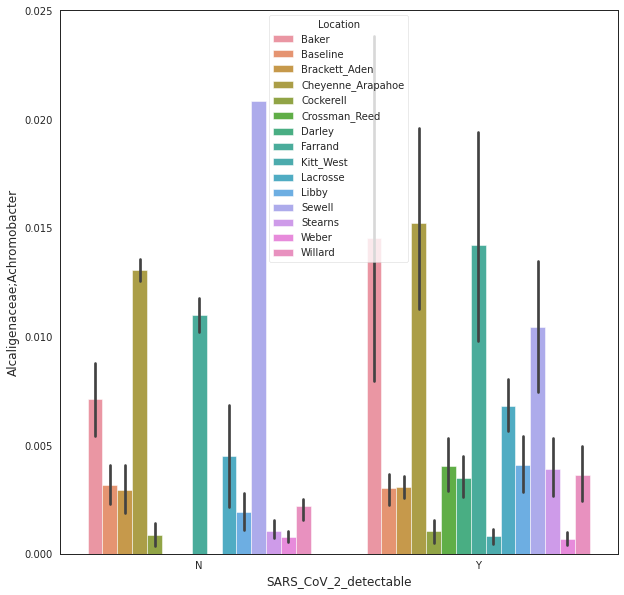

In [ ]:
sns.barplot('SARS_CoV_2_detectable',
            'Alcaligenaceae;Achromobacter',
            hue='Location',
            data=of_interest.dropna())

fig = plt.gcf()
fig.set_size_inches(10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


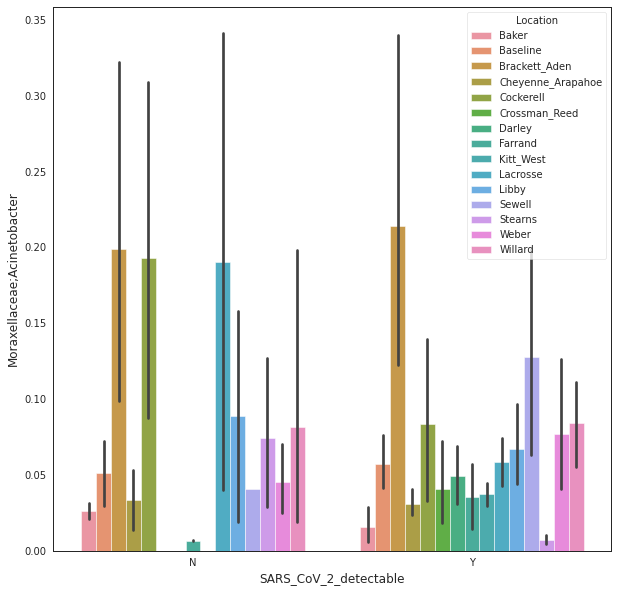

In [ ]:
sns.barplot('SARS_CoV_2_detectable',
            'Moraxellaceae;Acinetobacter',
            hue='Location',
            data=of_interest.dropna())

fig = plt.gcf()
fig.set_size_inches(10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


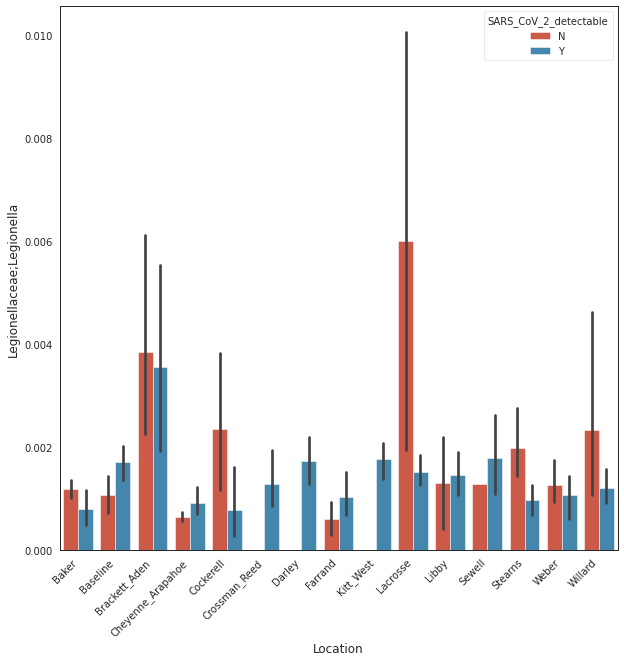

In [ ]:
ax = sns.barplot('Location',
            'Legionellaceae;Legionella',
            hue='SARS_CoV_2_detectable',
            data=of_interest.dropna())
ax.set_xticklabels(labels=of_interest['Location'].unique(),
                   rotation=45,
                   ha='right')
fig = plt.gcf()
fig.set_size_inches(10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


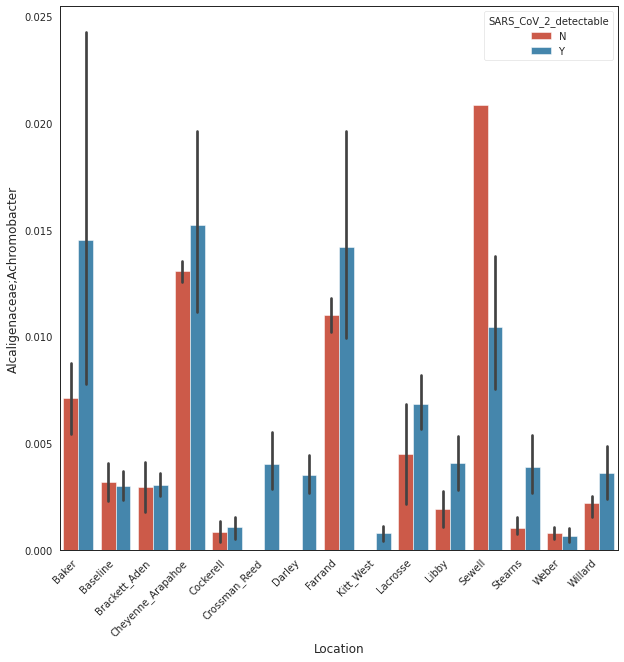

In [ ]:
ax = sns.barplot('Location',
            'Alcaligenaceae;Achromobacter',
            hue='SARS_CoV_2_detectable',
            data=of_interest.dropna())
ax.set_xticklabels(labels=of_interest['Location'].unique(),
                   rotation=45,
                   ha='right')
fig = plt.gcf()
fig.set_size_inches(10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


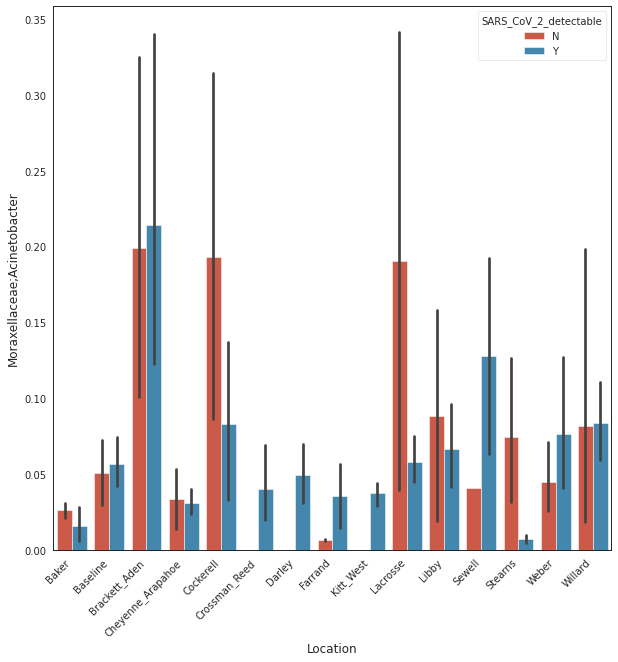

In [ ]:
ax = sns.barplot('Location',
            'Moraxellaceae;Acinetobacter',
            hue='SARS_CoV_2_detectable',
            data=of_interest.dropna())
ax.set_xticklabels(labels=of_interest['Location'].unique(),
                   rotation=45,
                   ha='right')
fig = plt.gcf()
fig.set_size_inches(10,10)

## Longitudinal plots

In [ ]:
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


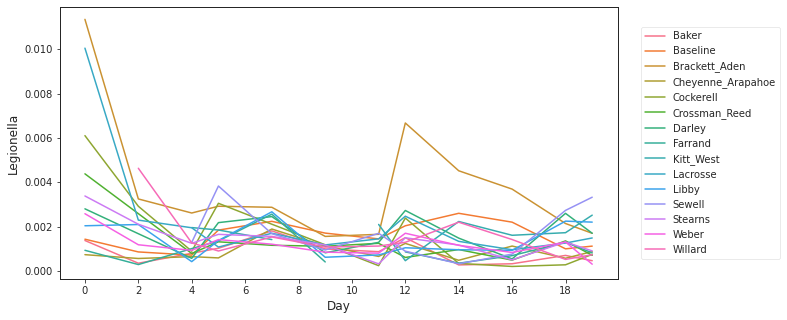

In [ ]:
ax = sns.lineplot('DaysSince',
                  'Legionellaceae;Legionella',
                  hue='Location',
                  data=of_interest)
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='right')

ax.set_ylabel('Legionella')
ax.set_xlabel('Day')
ax.set_xticks(np.arange(0,20,2))

fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


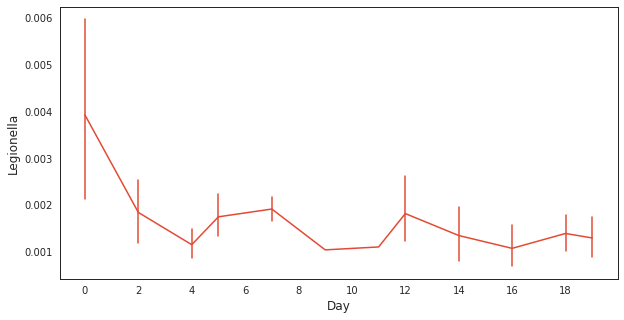

In [ ]:
ax = sns.lineplot('DaysSince',
                 'Legionellaceae;Legionella',
                  err_style='bars'
                  data=of_interest)

ax.set_ylabel('Legionella')
ax.set_xlabel('Day')
ax.set_xticks(np.arange(0,20,2))

fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


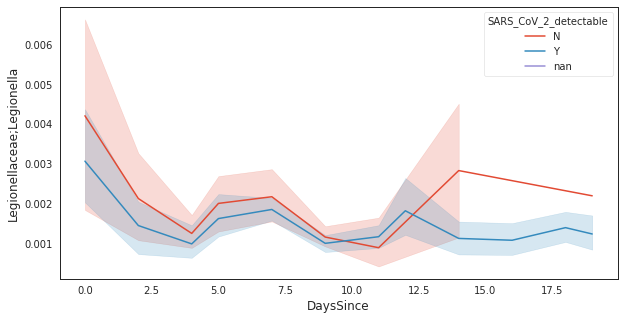

In [ ]:
sns.lineplot('DaysSince',
             'Legionellaceae;Legionella',
             hue='SARS_CoV_2_detectable',
              data=of_interest)

fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


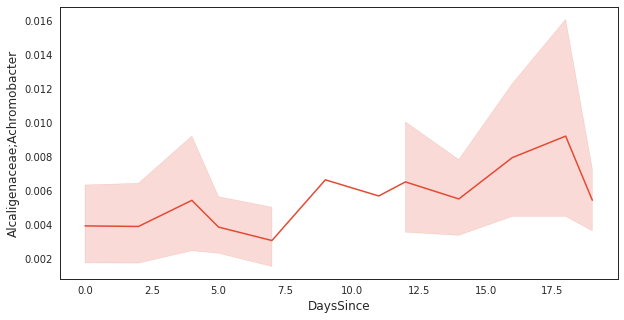

In [ ]:
sns.lineplot('DaysSince',
             'Alcaligenaceae;Achromobacter',
              data=of_interest)

fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


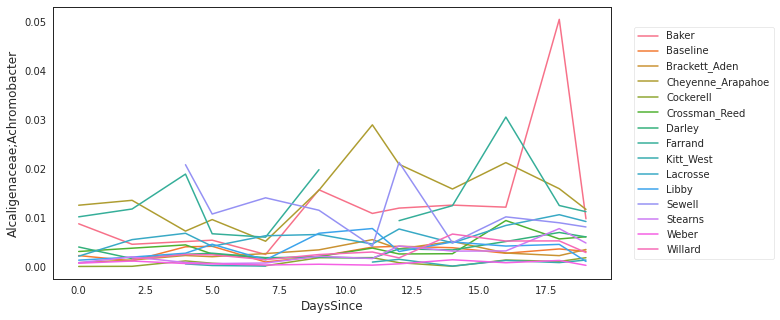

In [ ]:
sns.lineplot('DaysSince',
             'Alcaligenaceae;Achromobacter',
             hue='Location',
             data=of_interest)
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='right')
fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


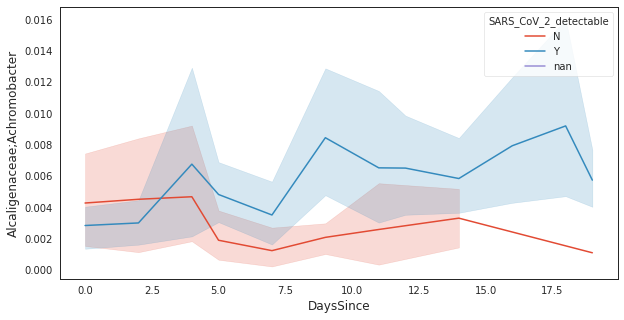

In [ ]:
sns.lineplot('DaysSince',
             'Alcaligenaceae;Achromobacter',
             hue='SARS_CoV_2_detectable',
             data=of_interest)

fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


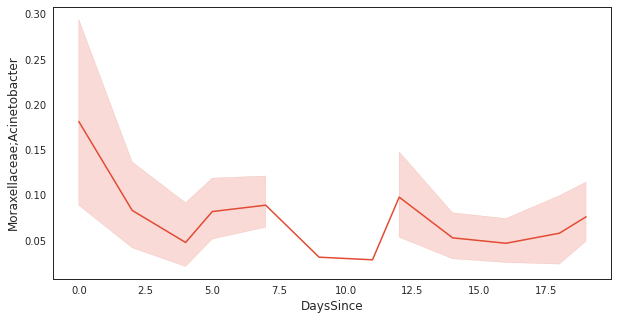

In [ ]:
sns.lineplot('DaysSince',
             'Moraxellaceae;Acinetobacter',
              data=of_interest)

fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


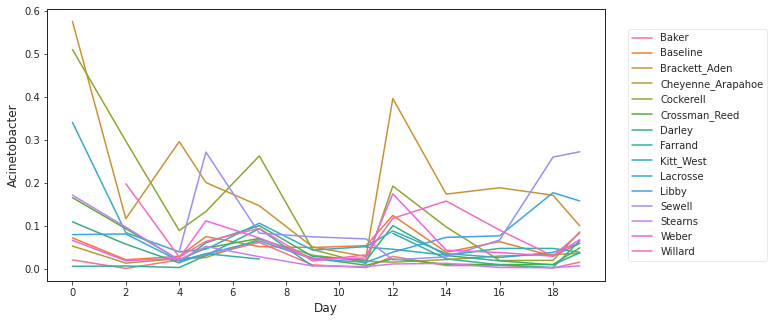

In [ ]:
ax = sns.lineplot('DaysSince',
                  'Moraxellaceae;Acinetobacter',
                   hue='Location',
                   data=of_interest)
plt.legend(bbox_to_anchor=(1.3, 0.5),loc='right')

ax.set_ylabel('Acinetobacter')
ax.set_xlabel('Day')
ax.set_xticks(np.arange(0,20,2))

fig = plt.gcf()
fig.set_size_inches(10,5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


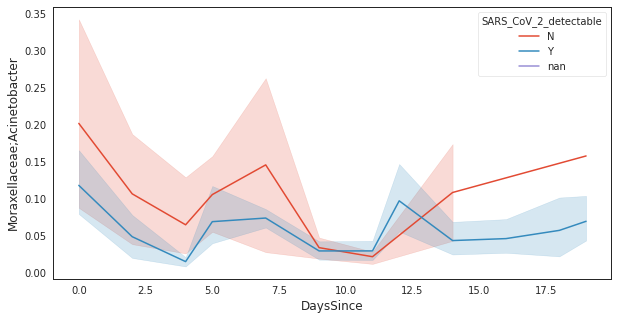

In [ ]:
sns.lineplot('DaysSince',
             'Moraxellaceae;Acinetobacter',
             hue='SARS_CoV_2_detectable',
             data=of_interest)

fig = plt.gcf()
fig.set_size_inches(10,5)

Per suggestions from other class members, I think we'll stop the investigation of these taxa here.